In [1]:
import bento
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score

import pickle
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
data = bento.io.read_h5ad("../../data/locfish/locfish_eval_20211019.h5ad")
data.shape

(10000, 1)

In [3]:
cell_by_feature = bento.tl.get_features(data, bento.tl.PATTERN_MODEL_FEATURE_NAMES, min_count=0)
cell_by_feature.head()

,,cell_inner_proximity,nucleus_inner_proximity,nucleus_outer_proximity,cell_inner_asymmetry,nucleus_inner_asymmetry,nucleus_outer_asymmetry,l_max,l_max_gradient,l_min_gradient,l_monotony,l_half_radius,point_dispersion,nucleus_dispersion
cell,gene,,,,,,,,,,,,,
mRNAlevel_100-cell2D-moderate-w1_HelaKyoto_Gapdh_2597_p20_cy3__Cell_CP_21__cell2D__25995-0,0,0.829736,0.851020,0.620248,0.818451,0.432661,0.943112,2.588469,0.595780,-0.628860,-0.997451,-22.290045,1.384136,1.328042
mRNAlevel_10-cell2D-weak-w1_HelaKyoto_Gapdh_2597_p21_cy3__Cell_CP_20__cell2D__28976-0,0,0.825032,0.787775,0.791329,0.734160,0.346235,0.786008,9.846196,2.569239,-1.000000,-0.959401,-13.461411,0.919131,0.927827
mRNAlevel_200-cell2D-moderate-w1_HelaKyoto_Gapdh_2597_p14_cy3__Cell_CP_28__cell2D__17988-0,0,0.827042,0.814255,0.598638,0.783305,0.312828,0.917744,2.198155,0.442243,-0.631441,-0.999329,-25.583847,1.348785,1.343532
mRNAlevel_100-cell2D-strong-w1_HelaKyoto_Gapdh_2597_p22_cy3__Cell_CP_26__cell2D__31657-0,0,0.891717,0.874524,0.589783,0.813132,0.376730,0.923885,2.112563,0.604250,-0.692180,-0.999425,-31.958605,1.295479,1.325677
mRNAlevel_400-cell2D-moderate-w1_HelaKyoto_Gapdh_2597_p14_cy3__Cell_CP_13__cell2D__16986-0,0,0.805541,0.835902,0.744821,0.789135,0.475451,0.903744,1.961746,0.393886,-0.579349,-0.998678,-14.650076,1.332575,1.337972


## Prepare datasets

In [4]:
classes = bento._utils.PATTERN_NAMES

Split train/test features

In [5]:
X = cell_by_feature.to_numpy()

le = LabelBinarizer().fit(classes)
y = le.transform(data.to_df("pattern").values.flatten())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=22, stratify=y
)

In [6]:
model = pickle.load(open(f"../../models/rf_calib_20220514.pkl", "rb"))

In [7]:
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

Threshold=0.45300, F-Score=0.95285, Old=0.95155
Threshold=0.43400, F-Score=0.76617, Old=0.75033
Threshold=0.37900, F-Score=0.79075, Old=0.76364
Threshold=0.43700, F-Score=0.97015, Old=0.96604
Threshold=0.50500, F-Score=0.97494, Old=0.97372


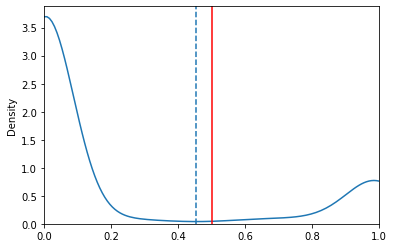

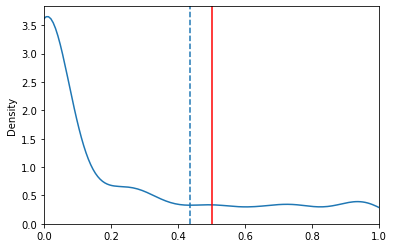

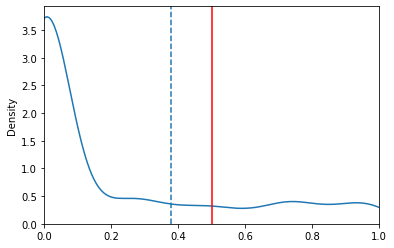

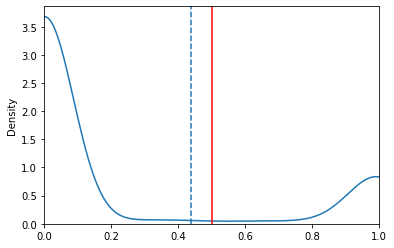

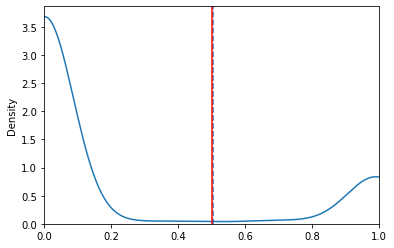

In [16]:
# keep probabilities for the positive outcome only
# define thresholds
thresholds = np.arange(0, 1, 0.001)

yhat = model.predict_proba(X_test)

for i in range(5):
    probs = yhat[:, i]
    plt.figure()
    ax = sns.kdeplot(probs)
    plt.xlim(0,1)
    # evaluate each threshold
    default_score = f1_score(y_test[:,i], to_labels(probs, 0.5))
    scores = [f1_score(y_test[:,i], to_labels(probs, t)) for t in thresholds]
    # get best threshold
    ix = np.argmax(scores)
    ax.axvline(thresholds[ix], linestyle='--')
    ax.axvline(0.5,color='red')
    print('Threshold=%.5f, F-Score=%.5f, Old=%.5f' % (thresholds[ix], scores[ix], default_score))